<a href="https://colab.research.google.com/github/MarijanMarkovic/Numerical-modelling-of-differential-equations/blob/main/Laplace_vj3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:fenics-packages/fenics
!apt-get update -qq
!apt install -y --no-install-recommends fenics
!rm -rf *

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


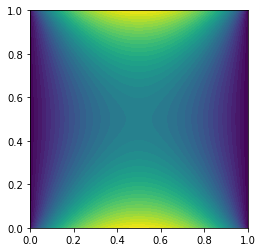

In [ ]:
from fenics import*
import matplotlib.pyplot as plt

#1. Mesh Gen
nx, ny=80, 80
mesh=UnitSquareMesh(nx, ny, 'crossed')
dim=mesh.geometric_dimension()

#1b. Marking the boundaries
boundary_markers = MeshFunction('size_t', mesh, dim-1, 0)
boundary_markers.rename('boundary label', 'boundary')

class BottomBoundary(SubDomain):
  def inside(self, x, on_boundary):
    return on_boundary and near(x[1], 0.0)
  
class TopBoundary(SubDomain):
  def inside(self, x, on_boundary):
    return on_boundary and near(x[1], 1.0)
  
class LeftBoundary(SubDomain):
  def inside(self, x, on_boundary):
    return on_boundary and near(x[0], 0.0)
  
class RightBoundary(SubDomain):
  def inside(self, x, on_boundary):
    return on_boundary and near(x[0], 1.0)
  
bottom=BottomBoundary()
top=TopBoundary()
left=LeftBoundary()
right=RightBoundary()

bottom.mark(boundary_markers, 1)
right.mark(boundary_markers, 2)
top.mark(boundary_markers, 3)
left.mark(boundary_markers, 4)

dx = Measure('dx', domain=mesh)
ds = Measure('ds', domain=mesh, subdomain_data=boundary_markers)

#2. Definition of Finite Element Space
degree=1
V=FunctionSpace(mesh, 'CG', degree)

gD=Constant(0.0)

bc=[
    DirichletBC(V, gD, boundary_markers, 2),
    DirichletBC(V, gD, boundary_markers, 4)
]

#3. Assembling/Solving
k=Constant(1.0)
alpha=Constant(1.0)
f=Constant(0.0)

gN=Constant(-1.0)
uR=Constant(1.0)

u=TestFunction(V)
v=TrialFunction(V)

a=k * dot(grad(u), grad(v)) * dx + alpha * u * v * ds
L=v * f * dx - gN * v * ds(1) + alpha * uR * v *ds(3)

u=Function(V)
solve(a==L, u, bc)

plot(u)
plt.show()

# 5a. save solution
vtkfile = File('Mark_1.pvd')
vtkfile << u
